In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
df_fair = sm.datasets.fair.load_pandas().data

In [4]:
df = df_fair

alpha = 0.05
a = df.affairs.quantile(alpha/2)
b = df.affairs.quantile(1-alpha/2)

df = df[(df.affairs >= a) & (df.affairs <= b)]
print(f'Kept {df.shape[0] / df_fair.shape[0]:.2%} of the data.')

print()
df_fair_middle = df

Kept 97.53% of the data.



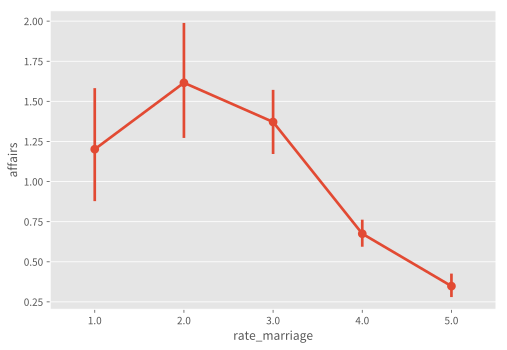

In [5]:
df = df_fair
sns.pointplot(data=df, x='rate_marriage', y='affairs')

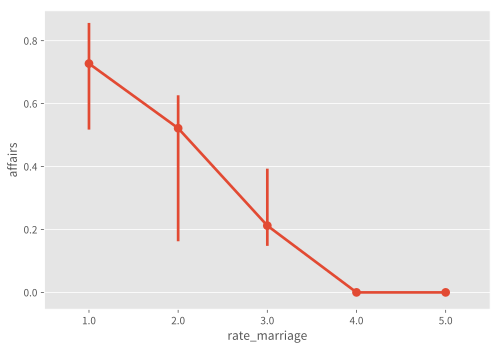

In [6]:
df = df_fair
sns.pointplot(data=df, x='rate_marriage', y='affairs', estimator=np.median)

In [7]:
df = df_fair
smf.ols('affairs ~ C(rate_marriage)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Mon, 13 May 2019   Prob (F-statistic):           1.25e-48
Time:                        13:35:54   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2017      0.218      5.524      0.000       0.775       1.628
C(rate_marriage)[T.2.0]     0.4141      0.247      1.679      0.093      -0.069       0.897
C(rate_marriage)[T.3.0]     0.1696      0.228      0.743      0.457      -0.278       0.617
C(rate_marriage)[T.4.0]    -0.5268      0.222     -2.370      0.018      -0.963      -0.091
C(rate_marriage)[T.5.0]    -0.8535      0.222     -3.853      0.000      -1.288      -0.419
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
df = df_fair
smf.ols('affairs ~ C(rate_marriage)', df).fit(cov_type='HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     41.16
Date:                Mon, 13 May 2019   Prob (F-statistic):           4.13e-34
Time:                        13:35:54   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2017      0.177      6.784      0.000       0.855       1.549
C(rate_marriage)[T.2.0]     0.4141      0.250      1.657      0.098      -0.076       0.904
C(rate_marriage)[T.3.0]     0.1696      0.203      0.834      0.404      -0.229       0.568
C(rate_marriage)[T.4.0]    -0.5268      0.182     -2.900      0.004      -0.883      -0.171
C(rate_marriage)[T.5.0]    -0.8535      0.180     -4.738      0.000      -1.207      -0.500
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [9]:
df = df_fair_middle
smf.ols('affairs ~ C(rate_marriage)', df).fit(cov_type='HC3').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     83.01
Date:                Mon, 13 May 2019   Prob (F-statistic):           9.13e-69
Time:                        13:35:54   Log-Likelihood:                -8610.0
No. Observations:                6209   AIC:                         1.723e+04
Df Residuals:                    6204   BIC:                         1.726e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.0302      0.129      7.959      0.000       0.776       1.284
C(rate_marriage)[T.2.0]    -0.0968      0.149     -0.651      0.515      -0.388       0.195
C(rate_marriage)[T.3.0]    -0.1830      0.136     -1.346      0.178      -0.450       0.084
C(rate_marriage)[T.4.0]    -0.5813      0.131     -4.432      0.000      -0.838      -0.324
C(rate_marriage)[T.5.0]    -0.8051      0.130     -6.183      0.000      -1.060      -0.550
==============================================================================
Omnibus:                     3565.183   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25630.879
Skew:                           2.764   Prob(JB):                         0.00
Kurtosis:                      11.277   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [10]:
df = df_fair
smf.quantreg('affairs ~ C(rate_marriage)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                affairs   Pseudo R-squared:              0.01115
Model:                       QuantReg   Bandwidth:                     0.06841
Method:                 Least Squares   Sparsity:                       0.1541
Date:                Mon, 13 May 2019   No. Observations:                 6366
Time:                        13:35:55   Df Residuals:                     6361
                                        Df Model:                            4
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.7273      0.008     93.924      0.000       0.712       0.742
C(rate_marriage)[T.2.0]    -0.2055      0.009    -23.421      0.000      -0.223      -0.188
C(rate_marriage)[T.3.0]    -0.5151      0.008    -63.441      0.000      -0.531      -0.499
C(rate_marriage)[T.4.0]    -0.7273      0.008    -91.917      0.000      -0.743      -0.712
C(rate_marriage)[T.5.0]    -0.7273      0.008    -92.238      0.000      -0.743      -0.712
===========================================================================================
"""

In [11]:
df = df_fair
smf.rlm('affairs ~ C(rate_marriage)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                affairs   No. Observations:                 6366
Model:                            RLM   Df Residuals:                     6361
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 13 May 2019                                         
Time:                        13:35:55                                         
No. Iterations:                    50                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.7327      0.002    387.485      0.000       0.729       0.736
C(rate_marriage)[T.2.0]    -0.2237      0.002   -104.367      0.000      -0.228      -0.219
C(rate_marriage)[T.3.0]    -0.4966      0.002   -250.426      0.000      -0.500      -0.493
C(rate_marriage)[T.4.0]    -0.7249      0.002   -375.137      0.000      -0.729      -0.721
C(rate_marriage)[T.5.0]    -0.7291      0.002   -378.635      0.000      -0.733      -0.725
===========================================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""